In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile 
import warnings
pd.set_option("display.max_columns",200)
warnings.simplefilter(action="ignore",category=Warning)
pd.set_option("display.width",500)



In [3]:
with ZipFile(r"C:\Users\esman\Documents\Github\MIUULMachineLearning\MiuulProject\HittersProject\dataset\Hitters-221212-014634.zip", 'r') as zObject:  
	zObject.extractall(path=r"C:\Users\esman\Documents\Github\MIUULMachineLearning\MiuulProject\HittersProject\dataset") 


In [4]:
data=pd.read_csv(r"C:\Users\esman\Documents\Github\MIUULMachineLearning\MiuulProject\HittersProject\dataset\Hitters\hitters.csv")
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı

Hits :1986-1987 sezonundaki isabet sayısı

HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı

Runs :1986-1987 sezonunda takımına kazandırdığı sayı

RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı

Walks: Karşı oyuncuya yaptırılan hata sayısı

Years: Oyuncunun major liginde oynama süresi (sene)

CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı

CHits :Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı

CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı

CRuns :Oyuncunun kariyeri boyunca takımına kazandırdığı sayı

CRBI :Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı

CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı

League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör:

Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör:

PutOuts: Oyun icinde takım arkadaşınla yardımlaşma:

Assits :1986-1987 sezonunda oyuncunun yaptığı asist sayısı:

Errors :1986-1987 sezonundaki oyuncunun hata sayısı:

Salary :Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden):

NewLeague 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör:

In [5]:
def data_preview(dataframe):
    print("Shape : " , dataframe.shape)
    print("\n**************************************************************************\n")
    print("info : ", dataframe.info())
    print("\n**************************************************************************\n")
    
    print("head : \n" , dataframe.head(3))
    print("\n**************************************************************************\n")
    
    print("tail : \n" , dataframe.tail(3))
    print("\n**************************************************************************\n")
    print(dataframe.select_dtypes(exclude="object").describe().T)
    sns.histplot(data=dataframe, x="Salary", kde=True)

Shape :  (322, 20)

**************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  

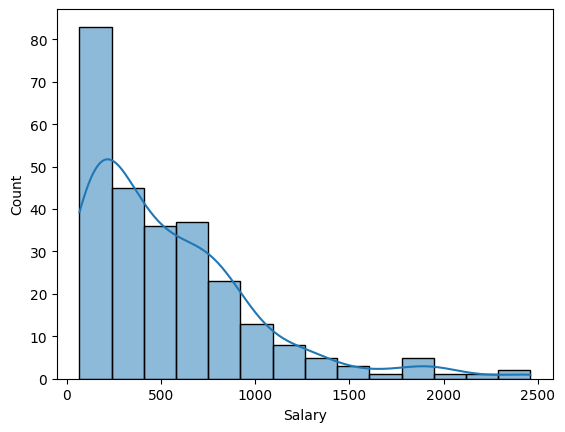

In [6]:
data_preview(data)

In [7]:
list(data.select_dtypes(include=["object"]).columns)

['League', 'Division', 'NewLeague']

In [8]:
def grab_num_cat_car_cols(dataframe):
    cat_cols=list(dataframe.select_dtypes(include=["object"]).columns)
    num_but_cat_cols=[col 
                      for col in dataframe.select_dtypes(exclude=["object"]).columns 
                      if len(dataframe[col].unique())<=10 ]
    cat_cols+=num_but_cat_cols
    num_cols=[col for col in dataframe.columns if col not in cat_cols]
    return num_cols,cat_cols

In [9]:
num_cols, cat_cols=grab_num_cat_car_cols(data)

In [10]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [11]:
cat_cols

['League', 'Division', 'NewLeague']

In [12]:
[list(range(0,5)),list(range(5,10)),
 list(range(10,15)),
 list(range(15,20)),list(range(20,25))]

[[0, 1, 2, 3, 4],
 [5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [13]:
years_range=[list(range(0,5)),list(range(5,10)),
                list(range(10,15)),list(range(15,20)),list(range(20,25))]
pd.cut(data["Years"],bins=[0,5,10,15,20,25],labels=["0-5","5-10","10-15","15-20","20-25"])


0        0-5
1      10-15
2        0-5
3      10-15
4        0-5
       ...  
317      0-5
318    10-15
319     5-10
320     5-10
321    10-15
Name: Years, Length: 322, dtype: category
Categories (5, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25']

In [14]:
def visual_num_cols(dataframe,col):
    plt.xticks(rotation=75)
    sns.barplot(data=dataframe,
                y=col,
                x=pd.cut(dataframe["Salary"],bins=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500],labels=["0-250","250-500","500-750","750-1000","1000-1250","1250-1500","1500-1750","1750-2000","2000-2250","2250-2500"]),
                hue=pd.cut(dataframe["Years"],bins=[0,5,10,15,20,25],labels=["0-5","5-10","10-15","15-20","20-25"]),
                palette="viridis")
    plt.figure(figsize=(15,30))
    
    plt.show()

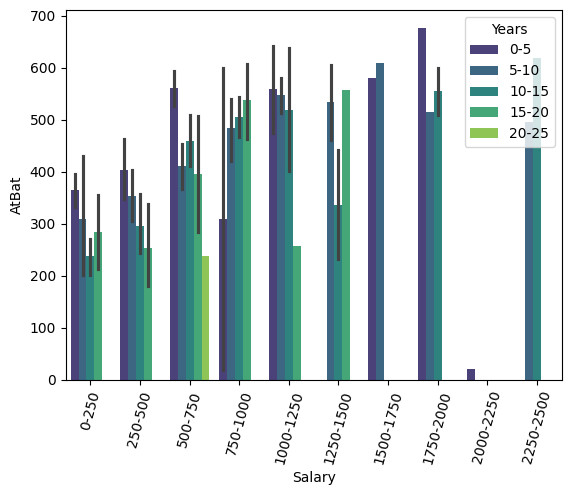

<Figure size 1500x3000 with 0 Axes>

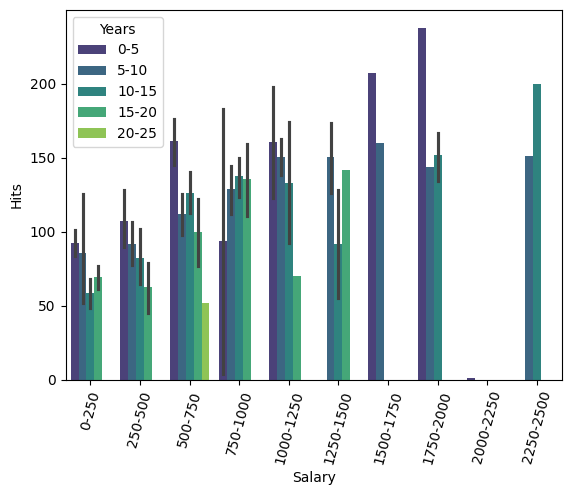

<Figure size 1500x3000 with 0 Axes>

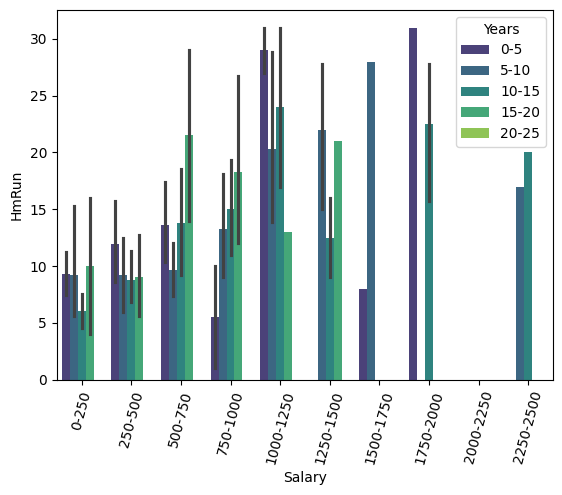

<Figure size 1500x3000 with 0 Axes>

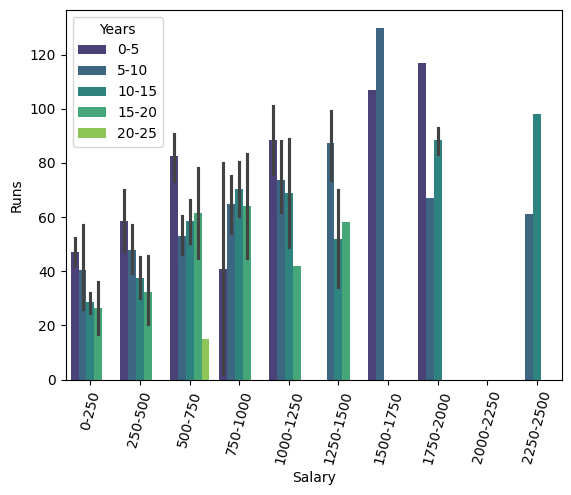

<Figure size 1500x3000 with 0 Axes>

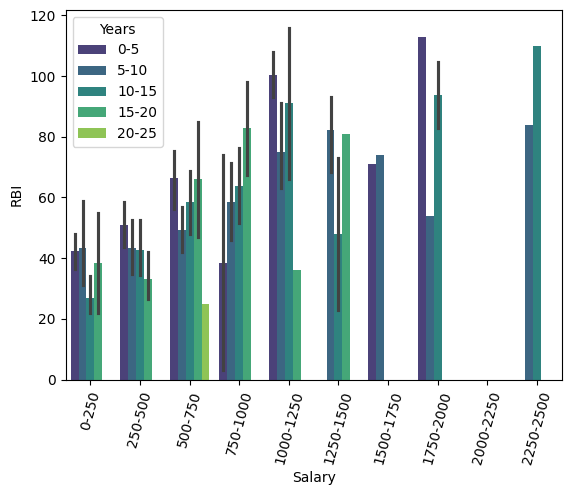

<Figure size 1500x3000 with 0 Axes>

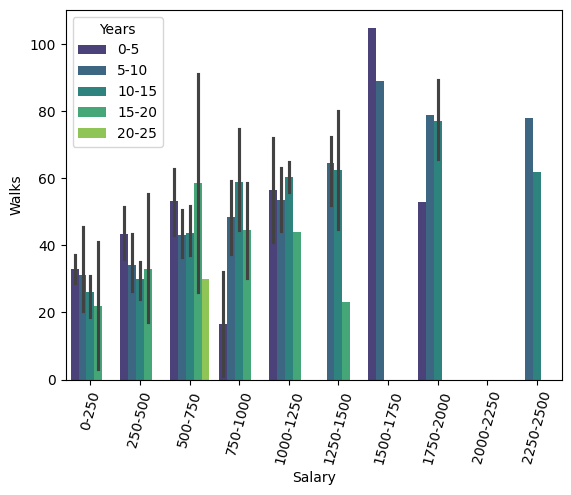

<Figure size 1500x3000 with 0 Axes>

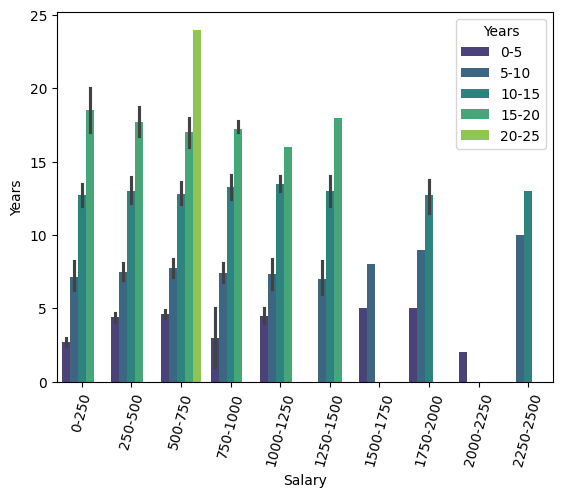

<Figure size 1500x3000 with 0 Axes>

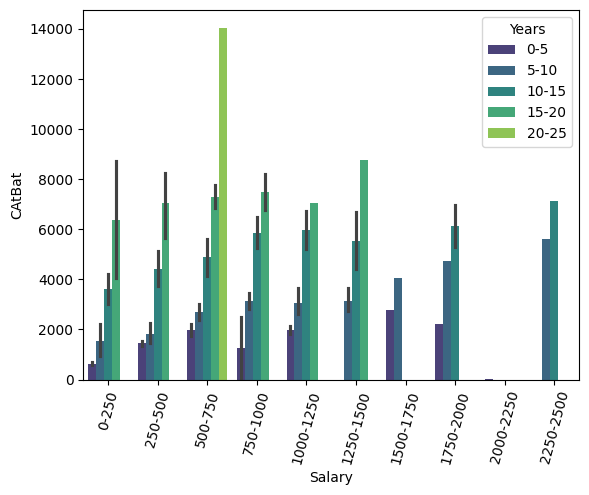

<Figure size 1500x3000 with 0 Axes>

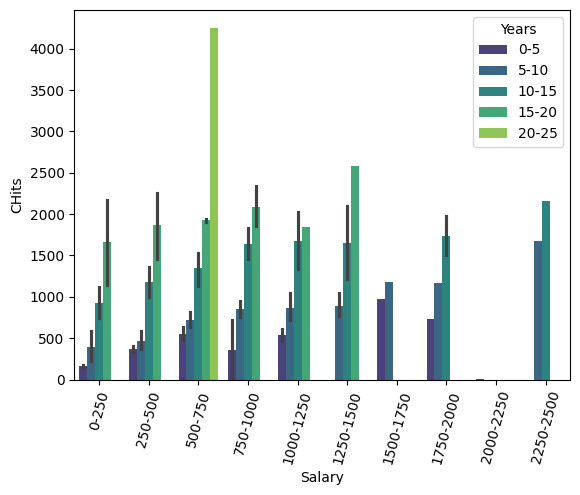

<Figure size 1500x3000 with 0 Axes>

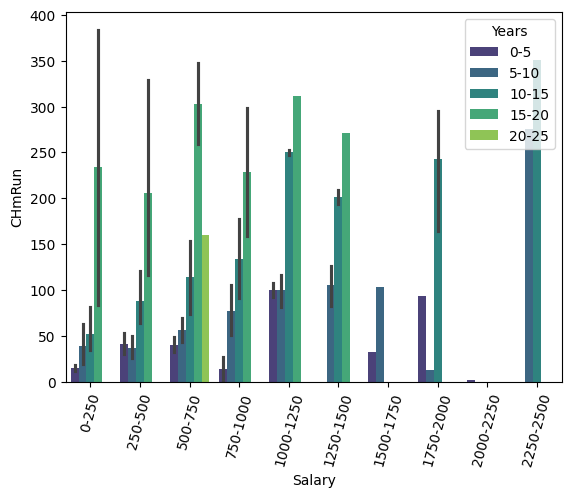

<Figure size 1500x3000 with 0 Axes>

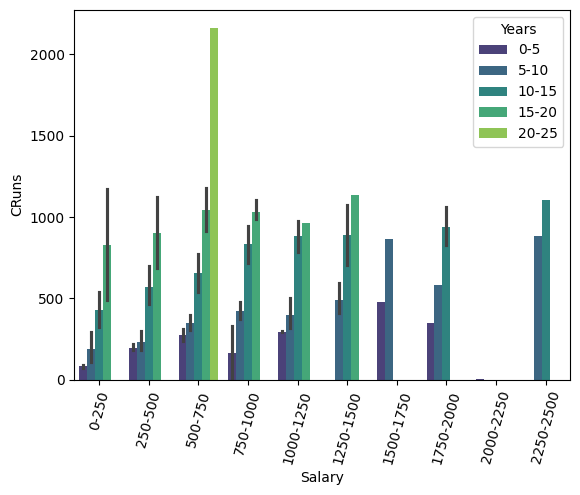

<Figure size 1500x3000 with 0 Axes>

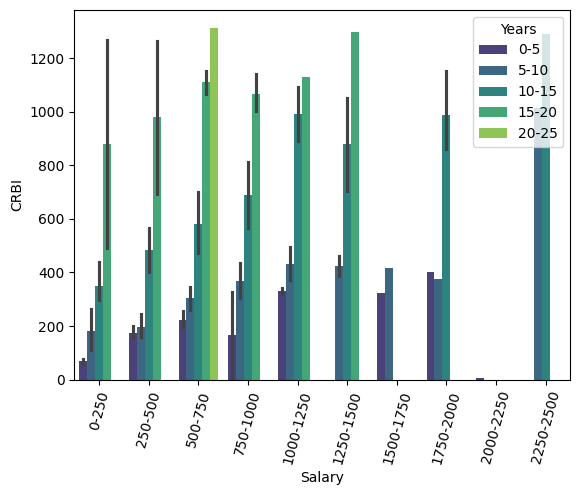

<Figure size 1500x3000 with 0 Axes>

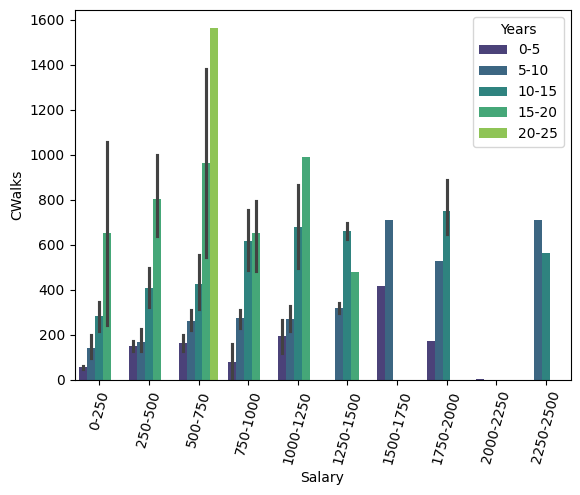

<Figure size 1500x3000 with 0 Axes>

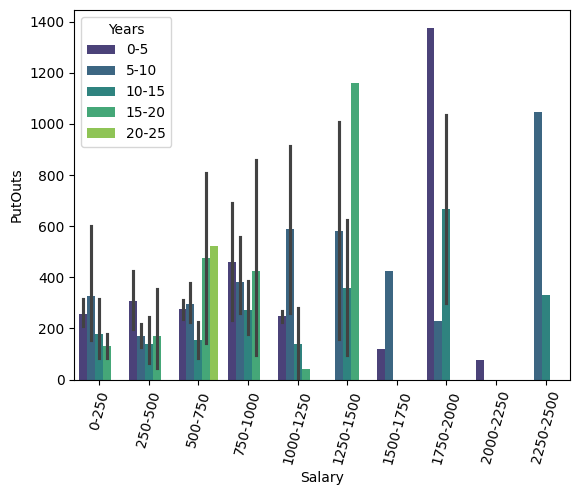

<Figure size 1500x3000 with 0 Axes>

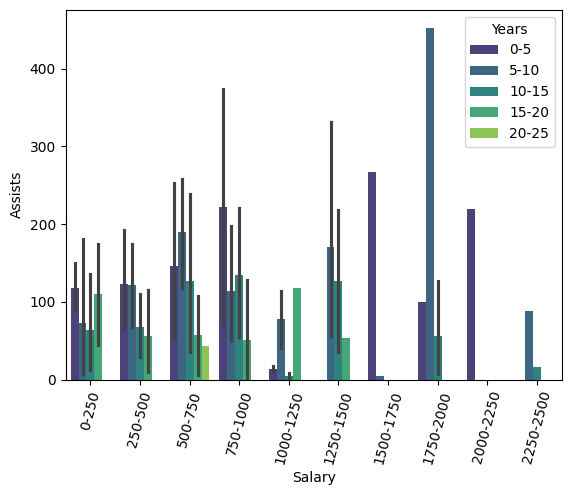

<Figure size 1500x3000 with 0 Axes>

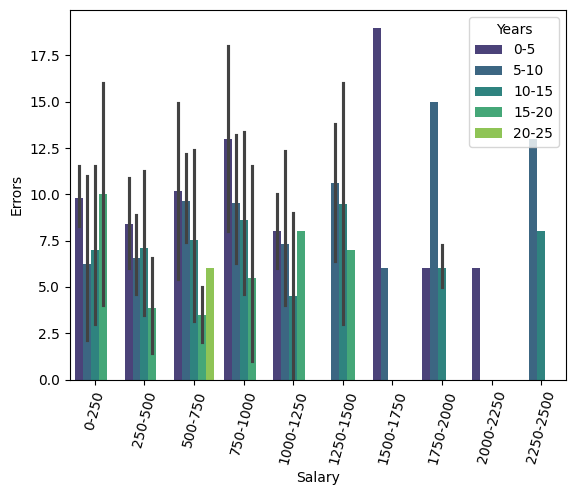

<Figure size 1500x3000 with 0 Axes>

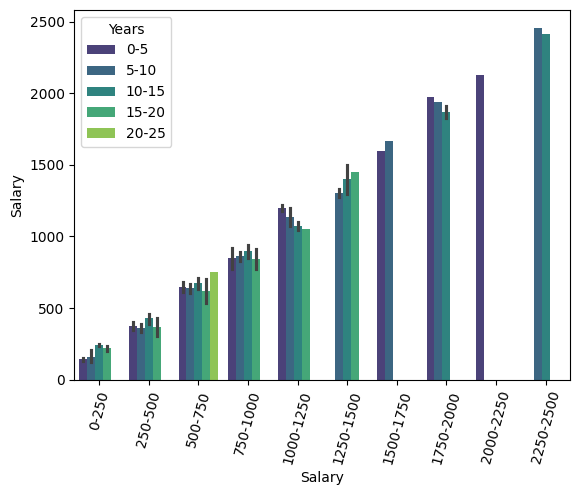

<Figure size 1500x3000 with 0 Axes>

In [15]:
for col in num_cols:
    visual_num_cols(dataframe=data,col=col)

In [40]:
def visual_cat_cols(dataframe,col):
    plt.xticks(rotation=75)
    sns.countplot(data=dataframe,
                x=col,
                #hue=pd.cut(dataframe["Salary"],bins=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500],labels=["0-250","250-500","500-750","750-1000","1000-1250","1250-1500","1500-1750","1750-2000","2000-2250","2250-2500"]),
                hue=pd.cut(dataframe["Years"],bins=[0,5,10,15,20,25],labels=["0-5","5-10","10-15","15-20","20-25"]),
                palette="crest")
    bars = plt.gca().containers
    for bar in bars:
        for rect in bar.patches:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')
    plt.tight_layout()
    plt.figure(figsize=(15,30))
    
    plt.show()

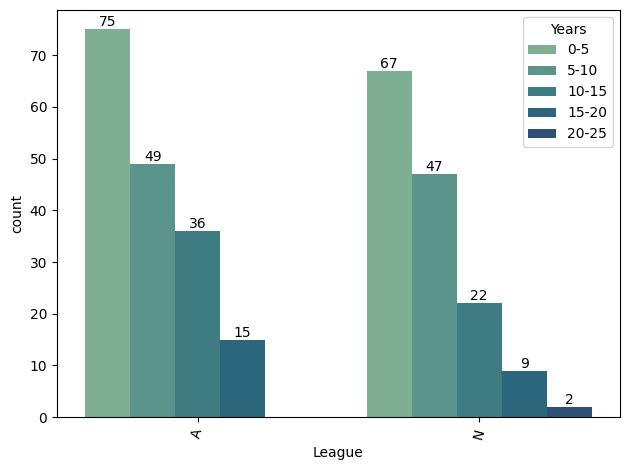

<Figure size 1500x3000 with 0 Axes>

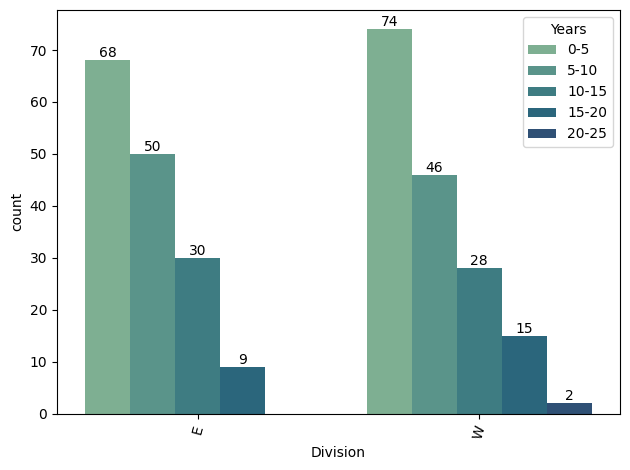

<Figure size 1500x3000 with 0 Axes>

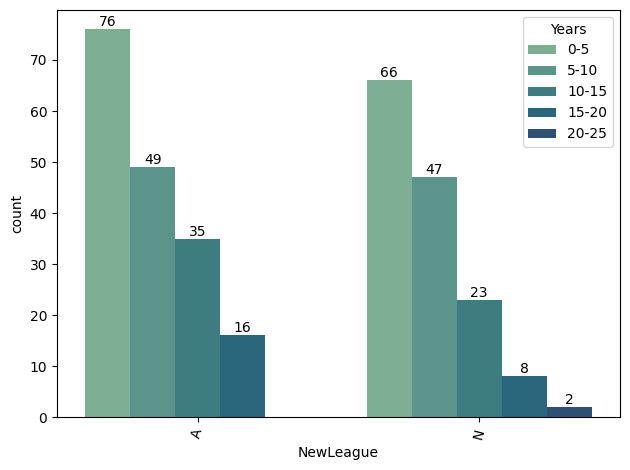

<Figure size 1500x3000 with 0 Axes>

In [41]:
for col in cat_cols:
    visual_cat_cols(data,col)

In [ ]:
## sezon sonuna kadar lig değiştiren oyuncuların maaşlarına bakalım
print(data["League"].value_counts())
data["NewLeague"].value_counts()
y=[val for val in data[["NewLeague","League"]].values if val[0]!=val[1]]

League
A    175
N    147
Name: count, dtype: int64
